In [109]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Perceptron Demo

In this notebook, we show how to train a perceptron for binary classification problems.

In [110]:
from numpy import *
from IPython.html.widgets import *
from IPython.display import display
import matplotlib.pyplot as plt
from IPython.core.display import clear_output

Generate some data `X` and binary labels `y`.

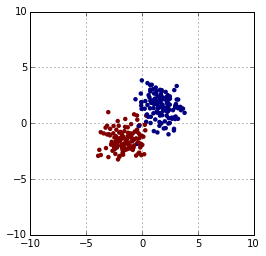

In [114]:
from sklearn.datasets import make_blobs

X = y = None # Global variables
@interact
def plot_blobs(n_samples=(10, 500),
               center1_x=1.5,
               center1_y=1.5,
               center2_x=-1.5,
               center2_y=-1.5):
    centers=array([[center1_x, center1_y],[center2_x, center2_y]])
    global X, y 
    X, y= make_blobs(n_samples=n_samples, n_features=2,
                      centers=centers, cluster_std=1.0)
    
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='none')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.grid()
    plt.axes().set_aspect('equal')


Then use the perceptron learning algorithm to classify these points.  You can press "run train_perceptron" to train the perceptron a single step.  The red arrow shows the direction of the weight vector (towards class 1, which are the red points.)

The update rule for the perceptron is very simple:

${\bf w} \leftarrow {\bf w} + \eta {\bf x}^{(i)} {\bf w} $

In the following code, ${\bf w}$ gets updated in a batch (uses averaged error gradient from training examples on each update).

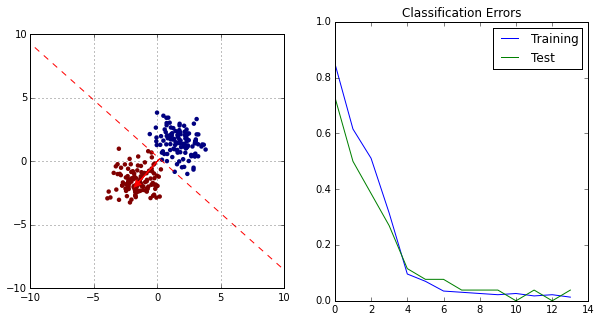

In [115]:
from sklearn.cross_validation import train_test_split
from numpy.random import random_sample 

t = y*2 - 1 # Change to {-1, 1}

w = random_sample(3) # Uniform from [0, 1)
errors = zeros((0, 2))
def train_perceptron(eta = 0.1):
    global w
    global errors
    
    # Split data to training and test
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.1)

    # Plot the current predictions and the hyperplane
    Xb = c_[X_train, ones((X_train.shape[0],1))] # X_train with bias
    t_pred = dot(Xb, w)
    
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].scatter(X_train[:,0], X_train[:,1], c=(t_pred > 0), edgecolor='none')
    axs[0].set_xlim([-10,10])
    axs[0].set_ylim([-10,10])
    axs[0].grid()
    axs[0].set_aspect('equal')
    cw=-w[2]/(w[0]**2+w[1]**2)
    ts=array([-100.0,100.0])
    axs[0].plot(-w[1]*ts+w[0]*cw, w[0]*ts+w[1]*cw, linestyle='--', color='r')
    axs[0].arrow(w[0]*cw,w[1]*cw, w[0], w[1], 
            head_width=0.5, head_length=0.5, fc='r', ec='r')    
    
    # Plot the classification errors
    train_error, test_error = [
        (( (tt > 0) - (dot(c_[XX, ones((XX.shape[0],1))], w) > 0))**2).mean()
        for tt, XX in [[t_train, X_train], [t_test, X_test]]
        ]
    errors = r_[errors, array([train_error, test_error])[newaxis,:]]
    axs[1].plot(errors)
    axs[1].set_title('Classification Errors')
    axs[1].set_ylim([0,1])
    axs[1].legend(['Training','Test'])
    
    # Update w
    w += eta * dot(t_train[newaxis,:], Xb).squeeze() / Xb.shape[0]

interact_manual(train_perceptron, eta=FloatSlider(min=0.01, max=1.0, value=0.1))

Note how $w$ tends to grow without bound.

Now try the same thing (go back to the previous cell) after loading a dataset that's not linearly separable:

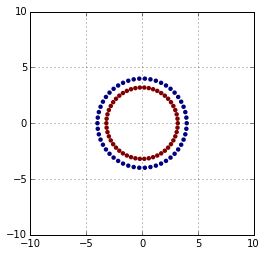

In [113]:
from sklearn.datasets import make_circles, make_moons
X, y = make_circles(100) # or try make_moons(100)
X*=4  # Make it a bit larger
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='none')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.grid()
plt.axes().set_aspect('equal')